# Feldman-Cousins confidence belt

In [16]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})

In [4]:
def Pois(s,b,n):
    """
    scope:
        returns the Poisson distribution
    input:
        s: expected no. of signal events
        b: expected no. of background events
        n: no. of observed events
    """
    return np.exp(-s-b)*(s+b)**n/factorial(n)

In [9]:
def fc_belt(mu_arr,n_arr,B,n_obs,alpha):
    """
    scope:
          computes the FC confidence belt for a given value of 
          observed no. of events and 
          expected no. of background events
    
    input:
          mu_arr: 1D array of possible values for the expected no. of signal events
          n_arr: 1D array of possible values of observed no. of events
          B: expected no. of background events
          n_obs: observed no. of events
          alpha: is s.t. 100*(1-alpha)% is the desired confidence level
          
    output:
          if n_obs >= min(nmax), report an interval:
             list = [mumin, mumax, nmins, nmax],
             where:
                mumin:  # min value of mu, corresponding to n_obs
                mumax: # max value of mu, corresponding to n_obs
                nmins,nmaxs: arrays for plotting
          else, report upper limit:
             list = [mumax, nmins],
             where:
                mumax: # max value of mu, corresponding to n_obs
                nmins: array for plotting
                     
    """
    
    nmins=[] # for each mu, store the value of n_min of the belt
    nmaxs=[] # for each mu, store the value of n_max of the belt
    Lhats=[] # for each n, store the maximum Likelihood (denominator of R)
    #print('n_arr=',n_arr)
    #print('mu_arr=',mu_arr)
    for n in n_arr:
        # for each n considered, Lhats will store the maximum likelihood among 
        # all the likelihoods defined for every mu considered
        Lhats.append(np.max(Pois(mu_arr,B,n)))
        #print('Pois(mu_arr,B,n)=',Pois(mu_arr,B,n))
        #print('Lhat=',Lhats[-1])
    for mu in mu_arr:
        #print(' mu=',mu)
        # for each mu considered, R stores all the likelihoods ratios
        # for each value of n considered
        R = Pois(mu,B,n_arr) / Lhats
        #print('R_arr=',R)
        # indices we get when sorting the R array
        # this determines the ordering of the contributions to the p-value
        args_sort=np.argsort(-R)  
        #print('  sorted R indices: ',args_sort)
        pval=0.
        for i in range(len(R)):
            pval += Pois(mu,B,n_arr[args_sort[i]])
            #print('    pval=',pval)
            if pval>=1-alpha:
                #print('     pval=',pval)
                nmin,nmax= n_arr[min(args_sort[:i+1])],n_arr[max(args_sort[:i+1])]
                nmins.append(nmin)
                nmaxs.append(nmax)
                #print('     mu, nmin,nmax=',mu,nmin,nmax)
                break
        if pval<1-alpha:
            print('for mu=',mu,' there is undercoverage')
            break
    if min(nmaxs)<=n_obs:
        #print('nmins=',nmins)
        mumin=min(mu_arr[np.where(np.array(nmaxs)==n_obs)])
        mumax=max(mu_arr[np.where(np.array(nmins)==n_obs)])
        return [mumin,mumax,nmins,nmaxs]
    else:
        mumax=max(mu_arr[np.where(np.array(nmins)==n_obs)])
        return [mumax,nmins]


## Reproducing known result

In [10]:
B=3                                                                                                                                                                                                 
n_obs=7    
CL = 90
#####
alpha = 1. - CL/100
mu_arr = np.linspace(0,15,15/0.005+1)  # 3001 elements                                                                                                                                                             
n_arr = np.arange(0,40) 
fc_output = fc_belt(mu_arr,n_arr,B,n_obs,0.1)
print(len(fc_output), '<== 4: interval, 2: upper limit')

4 <== 4: interval, 2: upper limit


In [11]:
low = fc_output[0]
up  = fc_output[1]
nmins = fc_output[2]
nmaxs = fc_output[3]

print('interval is: [',low,',',up,']')

interval is: [ 0.895 , 9.53 ]


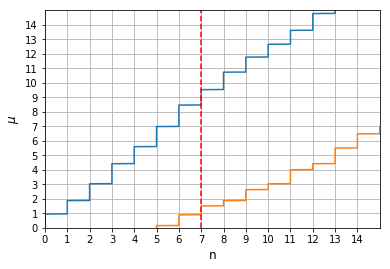

In [12]:
fig=plt.figure()                                                                                                                                                                                
ax=fig.add_subplot(1,1,1)                                                                                                                                                                       
ax.plot(nmins,mu_arr)                                                                                                                                                                           
ax.plot(nmaxs,mu_arr)     
ax.axvline(n_obs,color='red',ls='--')
ax.set_xlim(0,15)                                                                                                                                                                               
ax.set_ylim(0,15)                                                                                                                                                                               
ax.set_xticks(np.arange(0,15,1))                                                                                                                                                                
ax.set_yticks(np.arange(0,15,1))                                                                                                                                                                
ax.grid(which='major') 
ax.set_xlabel('n',fontsize=12)
ax.set_ylabel(r'$\mu$',fontsize=12)
plt.show()  

## Now trying to obtain upper limit

In [13]:
B=3                                                                                                                                                                                                 
n_obs=4  
CL = 90
#####
alpha = 1. - CL/100
mu_arr = np.linspace(0,15,15/0.005+1)                                                                                                                                                               
n_arr = np.arange(0,40) 
fc_output=fc_belt(mu_arr,n_arr,B,n_obs,alpha)
print(len(fc_output), '<== 4: interval, 2: upper limit')

2 <== 4: interval, 2: upper limit


In [14]:
up = fc_output[0]
nmins = fc_output[1]
print('upper limit: ',up)

upper limit:  5.595


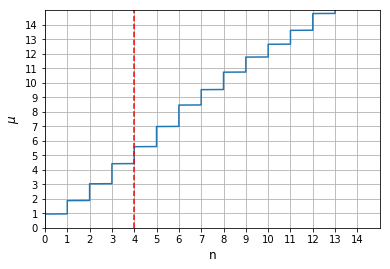

In [15]:
fig=plt.figure()                                                                                                                                                                                
ax=fig.add_subplot(1,1,1)                                                                                                                                                                       
ax.plot(nmins,mu_arr)      
ax.axvline(n_obs,color='red',ls='--')
ax.set_xlim(0,15)                                                                                                                                                                               
ax.set_ylim(0,15)                                                                                                                                                                               
ax.set_xticks(np.arange(0,15,1))                                                                                                                                                                
ax.set_yticks(np.arange(0,15,1))                                                                                                                                                                
ax.grid(which='major') 
ax.set_xlabel('n',fontsize=12)
ax.set_ylabel(r'$\mu$',fontsize=12)
plt.show()   